In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import statsmodels.api as sm

np.random.seed(71)

coeffs = ['IP', 'BT', 'NEL', 'PLTH', 'RGEO', 'KAREA', 'EPS', 'MEFF']

In [2]:
R = pd.read_csv("../data/R.csv")

DB5P1 = pd.read_csv("../data/DB5.csv")
DB2P8 = pd.read_csv("../data/DB2P8.csv")

DB5 = DB5P1[["TAUTH"] + coeffs].apply(np.abs).apply(np.log)
DB5["id"] = DB5P1["id"]

DB2 = DB2P8[["TAUTH"] + coeffs].apply(np.abs).apply(np.log)
DB2["id"] = DB2P8["id"]

data = DB5.copy()

In [3]:
def compute_OLS_regression(data):
    # Adding a column for the intercept
    _df = data[coeffs]; _df.insert(
        loc = 0, 
        column = "intercept", 
        value = np.ones(len(_df))
    )
    X = _df.to_numpy()
    Y = data[["TAUTH"]].to_numpy()
    model = sm.OLS(Y,X)
    regression = model.fit()
    return regression
    
regression = compute_OLS_regression(data)
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 1.250e+04
Date:                Mon, 20 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:56:35   Log-Likelihood:                 1140.9
No. Observations:                6250   AIC:                            -2264.
Df Residuals:                    6241   BIC:                            -2203.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5185      0.029    -88.236      0.000      -2.574      -2.463
x1             1.1343      0.016     69.337      0.000       1.102       1.166
x2             0.0724      0.014      5.076      0.000       0.044       0.100
x3             0.1749      0.010     18.246      0.000       0.156       0.194
x4            -0.6827      0.007   -100.092      0.000      -0.696      -0.669
x5             1.4480      0.026     56.745      0.000       1.398       1.498
x6             0.2802      0.029      9.726      0.000       0.224       0.337
x7             0.0636      0.037      1.721      0.085      -0.009       0.136
x8             0.2140      0.017     12.538      0.000       0.181       0.247
==============================================================================
Omnibus:                      103.850   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.017
Skew:                          -0.148   Prob(JB):                     1.21e-37
Kurtosis:                       3.752   Cond. No.                         64.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
# Multiplication Factor 
γ = 100
# Re-scal=ed Covariance Matrix
COVM = pd.DataFrame(γ * regression.cov_params(), 
                    columns= ["intercept"] + coeffs, 
                    index  = ["intercept"] + coeffs
                   )
COVM

,intercept,IP,BT,NEL,PLTH,RGEO,KAREA,EPS,MEFF
intercept,0.081470,-0.006213,0.017640,-0.004058,-0.004046,0.009079,-0.011518,0.058950,-0.018026
IP,-0.006213,0.026763,-0.016536,-0.005552,0.000189,-0.034605,-0.025154,-0.050333,-0.000457
BT,0.017640,-0.016536,0.020326,0.000742,-0.002162,0.019989,0.023099,0.041455,-0.004041
NEL,-0.004058,-0.005552,0.000742,0.009191,-0.002711,0.015865,0.001103,0.014157,-0.002343
PLTH,-0.004046,0.000189,-0.002162,-0.002711,0.004652,-0.007419,-0.005033,-0.007224,0.000873
RGEO,0.009079,-0.034605,0.019989,0.015865,-0.007419,0.065112,0.031308,0.077594,-0.000990
KAREA,-0.011518,-0.025154,0.023099,0.001103,-0.005033,0.031308,0.082974,0.039296,-0.007695
EPS,0.058950,-0.050333,0.041455,0.014157,-0.007224,0.077594,0.039296,0.136531,-0.007435
MEFF,-0.018026,-0.000457,-0.004041,-0.002343,0.000873,-0.000990,-0.007695,-0.007435,0.029133


In [5]:
MEAN = pd.DataFrame(regression.params).T; MEAN.columns = columns = ["intercept"] + coeffs
MEAN

,intercept,IP,BT,NEL,PLTH,RGEO,KAREA,EPS,MEFF
0,-2.518511,1.13432,0.072368,0.174924,-0.68271,1.447975,0.280173,0.063607,0.214009


In [6]:
N = 15 #4000
def get_rand_sample(μ, σ, N):
    s = np.random.normal(μ, σ, N)
    return s


def get_rand_multivariate(Μ, Σ, N):
    s = np.random.multivariate_normal(Μ, Σ, N)
    return s

In [7]:
(γ * regression.cov_params()).shape

(9, 9)

In [8]:
PARAM_SAMPLING = pd.DataFrame(get_rand_multivariate(regression.params, γ * regression.cov_params(), N),
                             columns=["intercept"]+coeffs)
PARAM_SAMPLING

,intercept,IP,BT,NEL,PLTH,RGEO,KAREA,EPS,MEFF
0,-2.126365,1.068932,0.161214,0.076242,-0.668101,1.422909,0.169542,0.228755,0.155884
1,-2.508614,0.958330,0.238164,0.313381,-0.675904,1.733050,0.072349,0.451028,0.176323
2,-2.322964,1.327652,-0.098299,0.089611,-0.616007,1.043520,-0.151378,-0.276409,0.203358
3,-2.642387,0.866762,0.258272,0.144155,-0.624169,1.754900,0.503733,0.497073,0.386779
4,-2.841522,0.935052,0.058846,0.189889,-0.670377,1.675226,0.516407,0.159335,0.505527
5,-2.165323,0.983648,0.310108,0.202201,-0.717372,1.651566,0.457913,0.620920,0.165214
6,-2.693067,1.241759,0.060168,0.165880,-0.741227,1.361423,0.562241,-0.178927,0.106061
7,-2.697684,1.190844,-0.079656,0.133848,-0.606432,1.291909,-0.110846,-0.264557,0.389025
8,-2.582901,1.159966,0.057569,0.024843,-0.705325,1.454224,0.324044,-0.092750,0.483967
9,-2.361130,1.108226,0.096941,0.166302,-0.755322,1.538971,0.349454,0.236296,0.318327


In [9]:
"""params = ["intercept"] + coeffs
M = np.zeros((N, len(params)))

for i, parameter in enumerate(params):
    mu, sigma = MEAN[parameter][0], np.sqrt( COVM[parameter][parameter] )
    M[:, i] = get_rand_sample(mu, sigma, N)
    
PARAM_SAMPLING = pd.DataFrame(M, columns=params)""";

In [10]:
def get_hat_τ(X, parameters):
    I, B, n_e, P, R, κ, ε, M_eff = X 
    α0, αI, αB, αn, αP, αR, ακ, αε, αM_eff = parameters
    hat_τ = α0 + αI*I + αB*B + αn*n_e + αP*P + αR*R + ακ*κ + αε*ε + αM_eff*M_eff 
    return hat_τ

In [11]:
data_ = DB5.copy()
data_

,TAUTH,IP,BT,NEL,PLTH,RGEO,KAREA,EPS,MEFF,id
0,-2.975930,-1.217734,0.790728,1.332102,0.625938,0.527093,-0.025523,-1.418447,0.405465,HDULEH
1,-3.015527,-1.220102,0.790728,1.317480,0.705076,0.521172,-0.027988,-1.409604,0.405465,NAC6N1
2,-2.752786,-1.213686,0.790728,1.226712,0.123986,0.526502,-0.010556,-1.432100,0.405465,U2T1C7
3,-2.660547,-1.217734,0.790728,1.328400,0.319181,0.526502,-0.025933,-1.417369,0.405465,422XQB
4,-2.965979,-1.223495,0.790274,1.347294,0.709513,0.521766,-0.031387,-1.406800,0.405465,WZ9FED
...,...,...,...,...,...,...,...,...,...,...
6245,-4.094745,-1.515037,0.674474,1.593105,-0.486946,-0.189467,0.102557,-1.347185,0.693147,NGC85H
6246,-4.068677,-1.514582,0.668854,1.631004,-0.452871,-0.179605,0.096219,-1.354725,0.693147,ID1IP4
6247,-3.671826,-1.515037,0.668342,1.674664,-0.977634,-0.180324,0.098034,-1.355399,0.693147,K19A5H
6248,-1.753886,-0.020815,1.567574,1.252763,1.631591,0.897719,-0.000300,-1.116746,0.693147,D26CA1


In [12]:
for p in range(len(PARAM_SAMPLING)):
    data_[f"τ_{p}"] = np.zeros(len(DB5))
    for observation in range(len(DB5)):
        data_.iloc[observation, len(data_.columns) - 1] = get_hat_τ(
            data_.loc[observation].loc[coeffs].values,
            PARAM_SAMPLING.loc[p].values
        )

In [13]:
params = ["intercept"] + coeffs

In [14]:
hat_τ = data_[data_.columns[len(params) + 1:]]
residuals = hat_τ.sub( data_["TAUTH"], axis=0 )
abs_relative_residual = (residuals.div( data_["TAUTH"], axis=0 )).apply( np.abs )

In [15]:
data_[["TAUTH"] + list(hat_τ.columns)]

,TAUTH,τ_0,τ_1,τ_2,τ_3,τ_4,τ_5,τ_6,τ_7,τ_8,τ_9,τ_10,τ_11,τ_12,τ_13,τ_14
0,-2.975930,-3.132785,-3.149535,-3.255207,-3.328420,-3.251514,-3.252526,-3.400568,-3.195310,-3.272272,-3.289098,-3.260027,-3.201399,-3.350766,-3.186848,-3.251837
1,-3.015527,-3.196123,-3.216327,-3.316661,-3.389212,-3.319340,-3.320000,-3.475622,-3.257794,-3.341429,-3.361813,-3.332213,-3.262396,-3.424822,-3.249613,-3.326428
2,-2.752786,-2.802564,-2.845510,-2.949180,-3.027084,-2.926680,-2.912367,-3.030909,-2.899007,-2.910899,-2.921908,-2.901207,-2.929295,-2.985820,-2.894570,-2.918498
3,-2.660547,-2.928785,-2.943923,-3.067426,-3.138192,-3.047603,-3.033709,-3.175032,-3.010781,-3.057092,-3.058810,-3.043965,-3.018599,-3.111226,-2.993171,-3.036773
4,-2.965979,-3.199604,-3.211295,-3.320824,-3.390018,-3.320167,-3.319467,-3.479811,-3.260097,-3.348279,-3.363622,-3.337945,-3.257563,-3.421604,-3.246677,-3.325352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6245,-4.094745,-3.642643,-3.777842,-3.657890,-3.930164,-3.718208,-3.762911,-3.794314,-3.677133,-3.700313,-3.695446,-3.670390,-3.883963,-3.802223,-3.761556,-3.728865
6246,-4.068677,-3.651705,-3.776667,-3.660993,-3.936661,-3.721714,-3.772284,-3.801846,-3.676297,-3.710215,-3.703742,-3.675354,-3.884256,-3.810757,-3.761426,-3.723001
6247,-3.671826,-3.299219,-3.410271,-3.335215,-3.604034,-3.362463,-3.388386,-3.406068,-3.353672,-3.339953,-3.301300,-3.299682,-3.555674,-3.386514,-3.418678,-3.340446
6248,-1.753886,-1.760542,-1.691123,-2.011029,-1.805117,-1.948440,-1.713216,-2.130830,-1.944208,-1.892054,-1.918054,-2.077330,-1.864887,-1.919686,-1.744945,-2.103292


In [17]:
MDAPE = abs_relative_residual.median(axis=0)
MDAPE

τ_0     0.072325
τ_1     0.072219
τ_2     0.067907
τ_3     0.075333
τ_4     0.071385
τ_5     0.074809
τ_6     0.071560
τ_7     0.067096
τ_8     0.071928
τ_9     0.070094
τ_10    0.069386
τ_11    0.077954
τ_12    0.074898
τ_13    0.069460
τ_14    0.067339
dtype: float64

In [18]:
np.median( np.abs( MDAPE.values - np.median(MDAPE.values) ) )

0.0021739451608914634

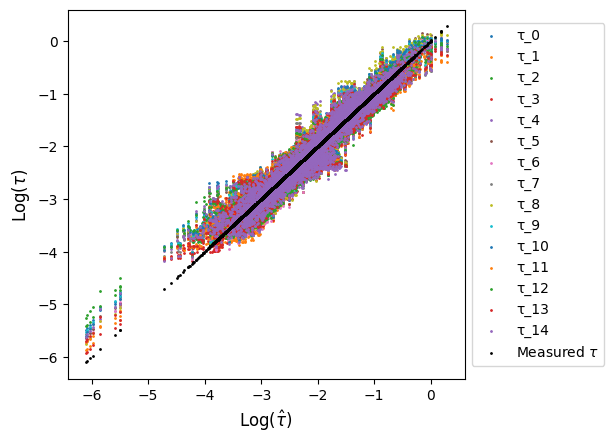

In [24]:
fig = plt.figure()
ax = plt.subplot(111)

for i,τ in enumerate(MDAPE.index):
    plt.scatter(data_["TAUTH"], data_[τ], s=1, label = τ)
plt.xlabel("Log($\\hat{\\tau}$)", fontsize=12)
plt.ylabel("Log($\\tau$)", fontsize=12)
plt.scatter(data_["TAUTH"], data_["TAUTH"], s=1, c="k", label = "Measured $\\tau$")

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));    